# Solution Part:
* Data Understanding
* Data Exploration
* Data Cleaning
* Data Preparation/Feature Engineering
* Model Building
* Model Evaluation

In [1]:
#Import all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the dataset
cars = pd.read_csv('Customer Database.csv', encoding='latin1')
cars_test = pd.read_excel('OH VINs w. Zips.xlsx')
cars_test_original = cars_test.copy()

In [4]:
cars.head()

,Location,sale_date,gross_sale_price,mileage,make,model,model_year,color,grade,drivable
0,ALBANY,20250522,450,161698,HYUNDAI,Sonata,2010.0,GRN,NaN,N
1,ALBANY,20250522,550,241828,KIA,Sorento,2011.0,WHT,NaN,Y
2,ALBANY,20250522,600,154306,JEEP,Compass,2014.0,WHT,NaN,Y
3,ALBANY,20250522,600,167461,KIA,Sedona,2016.0,WHT,NaN,Y
4,ALBANY,20250522,800,190512,CHRYSLER,Town & Country LWB,2007.0,BLU,NaN,Y


In [5]:
cars_test.head()

,VIN,Year,Make,Model,Mileage,Vehicle Grade (Approved CR),Representation,Auction lights - Green,Auction lights - Red,Sold Date,Operable,Zip,Transport Operable,Transport Inop,gross_sale_price
0,2GNALDEK2D6369962,2013,CHEVROLET,EQUINOX,114069,Grade 2.0,Inoperable,No,Yes,2024-09-03,Yes,43469,222,272,3600.000000
1,19VDE1F59DE016165,2013,ACURA,ILX,92052,Grade 2.7,Red Light,No,Yes,2024-10-10,Yes,43605,264,314,13271.428571
2,1C4BJWDG5FL508939,2015,JEEP,WRANG UNLTD,98082,Grade 2.7,Green/Yellow,Yes,No,2025-02-13,Yes,43605,264,314,13000.000000
3,1C4NJDEB9FD208108,2015,JEEP,COMPASS 4X4 4C,105313,Grade 2.8,Green Light,Yes,No,2024-05-23,Yes,43605,264,314,9800.000000
4,1C4PJLDB5GW229483,2016,JEEP,CHEROKEE FWD 4C,118073,Grade 2.8,Green Light,Yes,No,2025-02-13,Yes,43605,264,314,5000.000000


In [35]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [36]:
pd.set_option('display.max_rows', None)

In [37]:
cars.count()

Location            1089106
sale_date           1089106
gross_sale_price    1089106
mileage             1089106
make                 368642
model                368644
model_year          1080869
color               1079912
grade                653364
drivable             927084
dtype: int64

In [38]:
cars.isnull().sum()

Location                 0
sale_date                0
gross_sale_price         0
mileage                  0
make                720464
model               720462
model_year            8237
color                 9194
grade               435742
drivable            162022
dtype: int64

Data Exploration

In [39]:
cars = cars.drop(['Location','color','sale_date'], axis=1)
cars_test = cars_test.drop(['VIN','Auction lights - Green','Auction lights - Red','Zip','Transport Operable','Transport Inop','Representation','Sold Date'], axis=1)

In [40]:
# Step 1: Rename the columns
cars_test = cars_test.rename(columns={
    'Year': 'model_year',
    'Make': 'make',
    'Model': 'model',
    'Mileage': 'mileage',
    'Vehicle Grade (Approved CR)': 'grade',
    'Operable': 'drivable',
})

# Step 2: Format the sale_date as YYYYMMDD
# cars_test['sale_date'] = pd.to_datetime(cars_test['sale_date'], errors='coerce').dt.strftime('%Y%m%d').astype(int)

# Step 3: Remove 'Grade ' prefix from the grade column
cars_test['grade'] = (
    cars_test['grade']
        .str.replace('Grade', '', regex=False)
        .str.replace(': Salvage', '', regex=False)
        .str.replace('Unknown', '', regex=False)
        .replace('', np.nan)  # ← handles empty strings
)

cars_test['drivable'] = cars_test['drivable'].replace('Yes', 'Y')


cars_test['grade'] = pd.to_numeric(cars_test['grade'], errors='coerce')


In [41]:
cars_test.head()

,model_year,make,model,mileage,grade,drivable,gross_sale_price
0,2013,CHEVROLET,EQUINOX,114069,2.0,Y,3600.000000
1,2013,ACURA,ILX,92052,2.7,Y,13271.428571
2,2015,JEEP,WRANG UNLTD,98082,2.7,Y,13000.000000
3,2015,JEEP,COMPASS 4X4 4C,105313,2.8,Y,9800.000000
4,2016,JEEP,CHEROKEE FWD 4C,118073,2.8,Y,5000.000000


In [42]:
cars.head()

,gross_sale_price,mileage,make,model,model_year,grade,drivable
0,450,161698,HYUNDAI,Sonata,2010.0,NaN,N
1,550,241828,KIA,Sorento,2011.0,NaN,Y
2,600,154306,JEEP,Compass,2014.0,NaN,Y
3,600,167461,KIA,Sedona,2016.0,NaN,Y
4,800,190512,CHRYSLER,Town & Country LWB,2007.0,NaN,Y


In [43]:
cars_numeric = cars.select_dtypes(include=['float64','int64'])

In [44]:
cars_numeric.corr()

,gross_sale_price,mileage,model_year,grade
gross_sale_price,1.000000,-0.571679,0.274843,0.516376
mileage,-0.571679,1.000000,-0.298726,-0.395790
model_year,0.274843,-0.298726,1.000000,0.278499
grade,0.516376,-0.395790,0.278499,1.000000


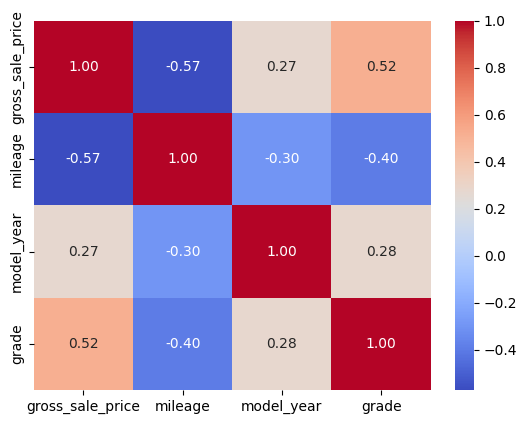

In [45]:
sns.heatmap(cars_numeric.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [46]:
#Correlation plot
cor = cars_numeric.corr()
cor

,gross_sale_price,mileage,model_year,grade
gross_sale_price,1.000000,-0.571679,0.274843,0.516376
mileage,-0.571679,1.000000,-0.298726,-0.395790
model_year,0.274843,-0.298726,1.000000,0.278499
grade,0.516376,-0.395790,0.278499,1.000000


In [47]:
cars.isnull().sum()

gross_sale_price         0
mileage                  0
make                720464
model               720462
model_year            8237
grade               435742
drivable            162022
dtype: int64

Data Preparation

In [48]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute   import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error

In [49]:
# remove engine from your list of categoricals...
categorical_feats = [
    'make','model','drivable'
]

# …and add it into numeric_feats
numeric_feats = [
    'mileage','model_year','grade'
]

In [50]:
from scipy.stats import skew
skewness = skew(cars['grade'].dropna())
print("Skewness:", skewness)

Skewness: -0.5451302375633185


In [51]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import scipy.stats as stats

# sns.histplot(cars['grade'], kde=True)
# plt.show()

# sns.boxplot(x=cars['grade'])
# plt.show()

# stats.probplot(cars['grade'].dropna(), dist="norm", plot=plt)
# plt.show()


In [52]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scale',   StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown', add_indicator=True)),
    ('ohe',      OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_feats),
    ('cat', cat_pipe, categorical_feats),
], remainder='drop', sparse_threshold=1.0)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [54]:
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['gross_sale_price']

X_test = cars_test[numeric_feats + categorical_feats]
y_test = cars_test['gross_sale_price']

In [26]:
X_test['drivable'].value_counts()

drivable
Y    1535
Name: count, dtype: int64

In [27]:
X_train['drivable'].value_counts()

drivable
Y    867406
N     31072
S     21670
K      5591
T      1345
Name: count, dtype: int64

In [ ]:
# # 4. Helper to build a full pipeline + extract coef names
# def make_model_pipeline(model, poly=False):
#     steps = []
#     if poly:
#         # expand numeric features to polynomial degree 2
#         steps.append(('poly', PolynomialFeatures(degree=2, include_bias=False)))
#     steps.append(('preproc', preprocessor))
#     steps.append(('reg', model))
#     return Pipeline(steps)

# def get_feature_names(pipeline):
#     """
#     After fitting, get the transformed feature names in order, so you can map back to coefficients.
#     Requires sklearn ≥ 1.0 for ColumnTransformer.get_feature_names_out.
#     """
#     # name from the 'preproc' step
#     feat_names = pipeline.named_steps['preproc'].get_feature_names_out()
#     if 'poly' in pipeline.named_steps:
#         # if polynomial, get names from poly step
#         feat_names = pipeline.named_steps['poly'].get_feature_names_out(feat_names)
#     return feat_names

In [ ]:
# # Linear Regression

# lin_pipe = make_model_pipeline(LinearRegression())
# lin_pipe.fit(X_train, y_train)
# lin_preds = lin_pipe.predict(X_test)

# lin_r2 = r2_score(y_test, lin_preds)
# lin_mae = mean_absolute_error(y_test, lin_preds)
# lin_mse = mean_squared_error(y_test, lin_preds)
# lin_rmse = np.sqrt(lin_mse)
# lin_mape = mean_absolute_percentage_error(y_test, lin_preds)

# lin_feat_names = get_feature_names(lin_pipe)
# lin_coefs = lin_pipe.named_steps['reg'].coef_
# lin_coef_df = pd.DataFrame({'feature': lin_feat_names, 'coef': lin_coefs}).sort_values(by='coef', key=lambda x: x.abs(), ascending=False)

In [ ]:
# #Lasso Regression (α=0.5)
# lasso_pipe = make_model_pipeline(Lasso(alpha=0.5, max_iter=10_000))
# lasso_pipe.fit(X_train, y_train)
# lasso_preds = lasso_pipe.predict(X_test)

# lasso_r2 = r2_score(y_test, lasso_preds)
# lasso_mae = mean_absolute_error(y_test, lasso_preds)
# lasso_mse = mean_squared_error(y_test, lasso_preds)
# lasso_rmse = np.sqrt(lasso_mse)
# lasso_mape = mean_absolute_percentage_error(y_test, lasso_preds)

# lasso_feat_names = get_feature_names(lasso_pipe)
# lasso_coefs = lasso_pipe.named_steps['reg'].coef_
# lasso_coef_df = pd.DataFrame({'feature': lasso_feat_names, 'coef': lasso_coefs}).sort_values(by='coef', key=lambda x: x.abs(), ascending=False)

In [ ]:
# # Ridge Regression (α=0.5)
# ridge_pipe = make_model_pipeline(Ridge(alpha=0.5))
# ridge_pipe.fit(X_train, y_train)
# ridge_preds = ridge_pipe.predict(X_test)

# ridge_r2 = r2_score(y_test, ridge_preds)
# ridge_mae = mean_absolute_error(y_test, ridge_preds)
# ridge_mse = mean_squared_error(y_test, ridge_preds)
# ridge_rmse = np.sqrt(ridge_mse)
# ridge_mape = mean_absolute_percentage_error(y_test, ridge_preds)

# ridge_feat_names = get_feature_names(ridge_pipe)
# ridge_coefs = ridge_pipe.named_steps['reg'].coef_
# ridge_coef_df = pd.DataFrame({'feature': ridge_feat_names, 'coef': ridge_coefs}).sort_values(by='coef', key=lambda x: x.abs(), ascending=False)

In [ ]:
# # For polynomial model only
# poly_num_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('poly', PolynomialFeatures(degree=2, include_bias=False)),
#     ('scale', StandardScaler())
# ])

# cat_pipe = Pipeline([
#     ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown', add_indicator=True)),
#     ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
# ])

# poly_preprocessor = ColumnTransformer([
#     ('num', poly_num_pipe, numeric_feats),
#     ('cat', cat_pipe, categorical_feats),
# ], remainder='drop', sparse_threshold=1.0)

# poly_pipe = Pipeline([
#     ('preproc', poly_preprocessor),
#     ('reg', LinearRegression())
# ])

# poly_pipe.fit(X_train, y_train)
# poly_preds = poly_pipe.predict(X_test)

# poly_r2 = r2_score(y_test, poly_preds)
# poly_mae = mean_absolute_error(y_test, poly_preds)
# poly_mse = mean_squared_error(y_test, poly_preds)
# poly_rmse = np.sqrt(poly_mse)
# poly_mape = mean_absolute_percentage_error(y_test, poly_preds)

# poly_feat_names = poly_pipe.named_steps['preproc'].get_feature_names_out()
# poly_coefs = poly_pipe.named_steps['reg'].coef_
# poly_coef_df = pd.DataFrame({'feature': poly_feat_names, 'coef': poly_coefs}).sort_values(by='coef', key=lambda x: x.abs(), ascending=False)

In [ ]:
# # Results
# def print_results(name, r2, mae, mse, rmse, mape, coef_df):
#     print(f"\n=== {name} ===")
#     print("Metrics:")
#     print(f"  R2:   {r2:.4f}")
#     print(f"  MAE:  {mae:.4f}")
#     print(f"  MSE:  {mse:.4f}")
#     print(f"  RMSE: {rmse:.4f}")
#     print(f"  MAPE: {mape:.4f}")
#     print("\nTop coefficients:")
#     print(coef_df.head(10).to_string(index=False))
    
# print_results("Linear", lin_r2, lin_mae, lin_mse, lin_rmse, lin_mape, lin_coef_df)

In [ ]:
# print_results("Lasso α=0.5", lasso_r2, lasso_mae, lasso_mse, lasso_rmse, lasso_mape, lasso_coef_df)

In [ ]:
# print_results("Ridge α=0.5", ridge_r2, ridge_mae, ridge_mse, ridge_rmse, ridge_mape, ridge_coef_df)

In [ ]:
# print_results("Polynomial Degree=2", poly_r2, poly_mae, poly_mse, poly_rmse, poly_mape, poly_coef_df)

In [55]:
# 4) Full pipeline with RF
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('rf',      RandomForestRegressor(
                    n_estimators=231,
                    max_depth=40,
                    min_samples_leaf=2,
                    max_features='log2',
                    random_state=42
               ))
])

In [56]:
# 5) Fit!
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['gross_sale_price']
pipeline.fit(X_train, y_train)    # should now run without the NaN error

Pipeline(steps=[('preproc',
                 ColumnTransformer(sparse_threshold=1.0,
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['mileage', 'model_year',
                                                   'grade']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 fill_value='Unknown',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'model',
                                                   'drivable'])])),
                ('rf',
                 RandomForestRegressor(max_depth=40, max_features='log2',
                                       min_samples_leaf=2, n_estimators=231,
                                       random_state=42))])

In [57]:
# 6a. …and get predictions directly on new data:
X_test = cars_test[numeric_feats + categorical_feats]
rf_predictions = pipeline.predict(X_test)

In [58]:
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mape = mean_absolute_percentage_error(y_test, rf_predictions)

# Display results
print("📊 Random Forest Regression Evaluation Metrics")
print(f"R² Score  : {rf_r2:.4f}")
print(f"MAE       : {rf_mae:.2f}")
print(f"MSE       : {rf_mse:.2f}")
print(f"RMSE      : {rf_rmse:.2f}")
print(f"MAPE      : {rf_mape:.2%}")

📊 Random Forest Regression Evaluation Metrics
R² Score  : 0.1569
MAE       : 4492.32
MSE       : 32509308.45
RMSE      : 5701.69
MAPE      : 137.44%


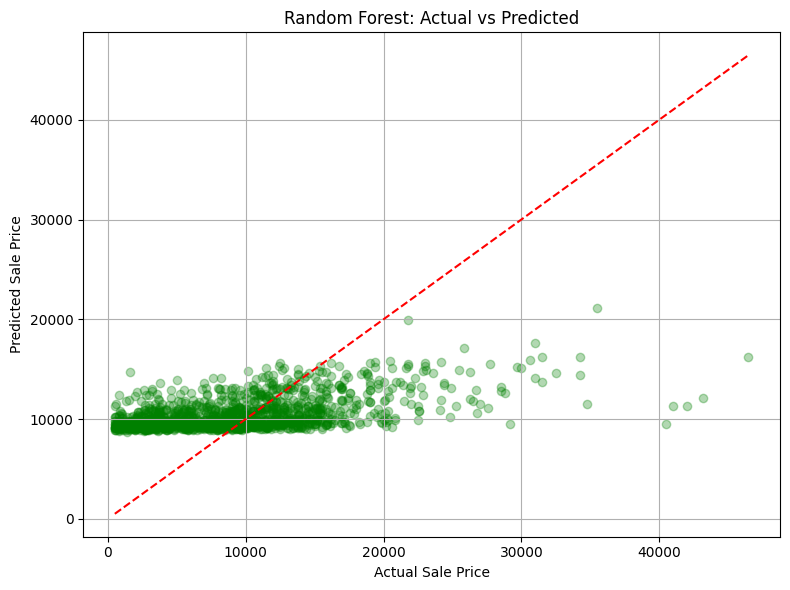

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_predictions, alpha=0.3, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

XGBoost

In [60]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [61]:
xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [62]:
xgb_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('xgb',     xgb)
])

In [63]:
# 3. Fit & predict just like before
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['gross_sale_price']

xgb_pipeline.fit(X_train, y_train)

xgb_new = cars_test[numeric_feats + categorical_feats]
xgb_predictions = xgb_pipeline.predict(xgb_new)

In [64]:
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(y_test, xgb_predictions)

# Display results
print("📊 XGBoost Regression Evaluation Metrics")
print(f"R² Score  : {xgb_r2:.4f}")
print(f"MAE       : {xgb_mae:.2f}")
print(f"MSE       : {xgb_mse:.2f}")
print(f"RMSE      : {xgb_rmse:.2f}")
print(f"MAPE      : {xgb_mape:.2%}")

📊 XGBoost Regression Evaluation Metrics
R² Score  : 0.2181
MAE       : 4065.97
MSE       : 30147702.57
RMSE      : 5490.69
MAPE      : 66.79%


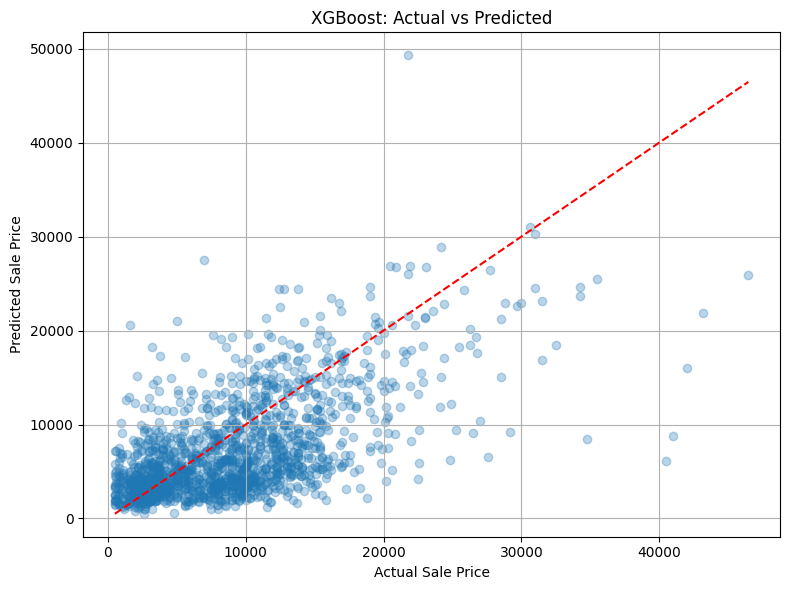

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, xgb_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('XGBoost: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

CatBoost

In [66]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.075,
    depth=10,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)


In [67]:
from sklearn.pipeline import Pipeline

catboost_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('catboost', catboost_model)
])

In [68]:
# Training features and target
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['gross_sale_price']

# Fit the pipeline
catboost_pipeline.fit(X_train, y_train)

# Predict on test data
X_test = cars_test[numeric_feats + categorical_feats]
catboost_preds = catboost_pipeline.predict(X_test)

In [88]:
catboost_r2 = r2_score(y_test, catboost_preds)
catboost_mae = mean_absolute_error(y_test, catboost_preds)
catboost_mse = mean_squared_error(y_test, catboost_preds)
catboost_rmse = np.sqrt(catboost_mse)
catboost_mape = mean_absolute_percentage_error(y_test, catboost_preds)

# Display results
print("📊 catboost Regression Evaluation Metrics")
print(f"R² Score  : {catboost_r2:.4f}")
print(f"MAE       : {catboost_mae:.2f}")
print(f"MSE       : {catboost_mse:.2f}")
print(f"RMSE      : {catboost_rmse:.2f}")
print(f"MAPE      : {catboost_mape:.2%}")

📊 catboost Regression Evaluation Metrics
R² Score  : 0.2687
MAE       : 3948.34
MSE       : 28198621.55
RMSE      : 5310.24
MAPE      : 72.49%


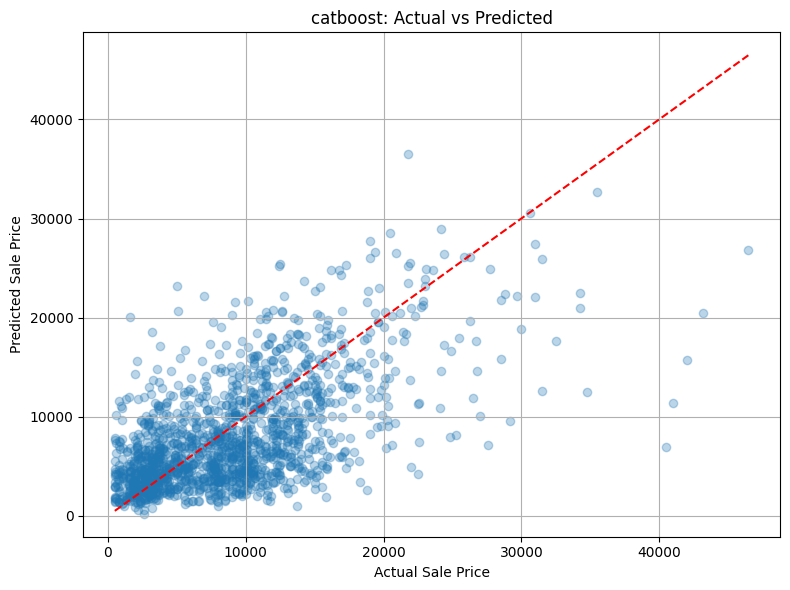

In [89]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, catboost_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('catboost: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

CatBoost Native Handling

In [72]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [73]:
# Define your categorical and numeric features
categorical_feats = ['make', 'model', 'drivable']
numeric_feats = ['mileage', 'model_year', 'grade']

# Combine for final feature set
all_feats = numeric_feats + categorical_feats

# Training data
X_train = cars[all_feats]
y_train = cars['gross_sale_price']

# Test data
X_test = cars_test[all_feats]
y_test = cars_test['gross_sale_price']  # If available

In [75]:
# Fill NaNs in categorical features with a string label (e.g., 'Unknown')
X_train[categorical_feats] = X_train[categorical_feats].fillna('Unknown')
X_test[categorical_feats] = X_test[categorical_feats].fillna('Unknown')

# Create CatBoost Pools to specify categorical columns
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_feats]

train_pool = Pool(X_train, y_train, cat_features=cat_features_indices)
test_pool = Pool(X_test, cat_features=cat_features_indices)

In [80]:
cat_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.075,
    depth=10,
    loss_function='RMSE',
    random_state=42,
    verbose=100  # Adjust for training feedback
)

cat_model.fit(train_pool)
cat_preds = cat_model.predict(test_pool)

0:	learn: 11506.3372610	total: 554ms	remaining: 2m 45s
100:	learn: 6915.7413941	total: 54.4s	remaining: 1m 47s
200:	learn: 6779.5840965	total: 1m 49s	remaining: 54s
299:	learn: 6709.4833620	total: 2m 48s	remaining: 0us


In [90]:
cat_r2 = r2_score(y_test, cat_preds)
cat_mae = mean_absolute_error(y_test, cat_preds)
cat_mse = mean_squared_error(y_test, cat_preds)
cat_rmse = np.sqrt(cat_mse)
cat_mape = mean_absolute_percentage_error(y_test, cat_preds)

# Display results
print("📊 catboost Regression Evaluation Metrics")
print(f"R² Score  : {cat_r2:.4f}")
print(f"MAE       : {cat_mae:.2f}")
print(f"MSE       : {cat_mse:.2f}")
print(f"RMSE      : {cat_rmse:.2f}")
print(f"MAPE      : {cat_mape:.2%}")

📊 catboost Regression Evaluation Metrics
R² Score  : 0.2745
MAE       : 3973.01
MSE       : 27971807.84
RMSE      : 5288.84
MAPE      : 73.20%


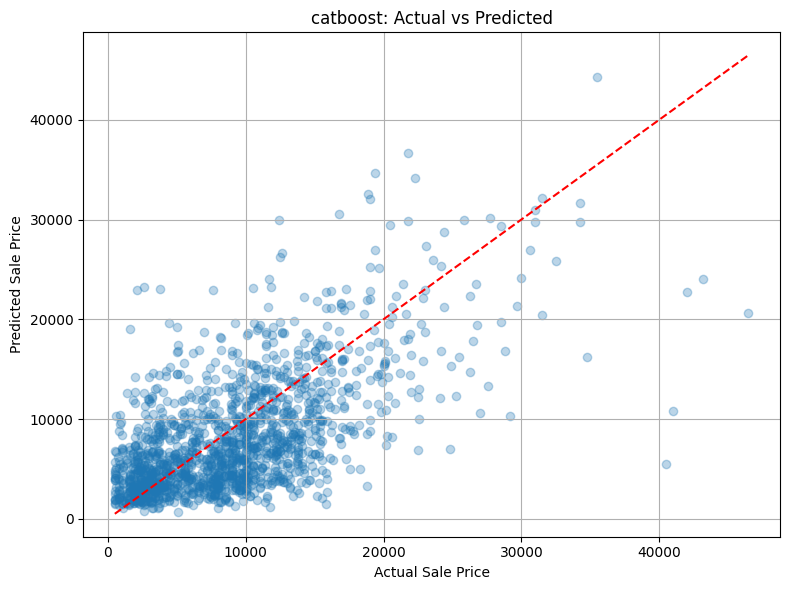

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, cat_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('catboost: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

Model Combination

In [83]:
import optuna
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import cross_val_score

In [84]:
# Define the base models with fixed parameters
catboost_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.075,
    depth=10,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)

xgb = XGBRegressor(
    n_estimators=292,
    max_depth=10,
    learning_rate=0.0769936478290876,
    min_child_weight=6,
    subsample=0.8553774408813275,
    colsample_bytree=0.9456452572230258,
    random_state=42
)

In [85]:
# 3) Build the stacking regressor
stack = StackingRegressor(
    estimators=[
        ('Cat',  catboost_model),
        ('xgb', xgb)
    ],
    final_estimator=XGBRegressor(
        n_estimators=50,
        learning_rate=0.1,
        random_state=42
    ),
    # passthrough=True  # if you want the original features concatenated to meta‑features
)

# 4) Put it all in one pipeline
stacking_pipeline = Pipeline([
    ('preproc', preprocessor),
    ('stack',   stack)
])

# 5) Fit & evaluate
X_train = cars[numeric_feats + categorical_feats]
y_train = cars['gross_sale_price']
X_test  = cars_test[numeric_feats + categorical_feats]
#y_test  = cars_test['gross_sale_price']  # assuming you have ground‑truth here

stacking_pipeline.fit(X_train, y_train)
y_pred = stacking_pipeline.predict(X_test)

#print("Stacked R²:", r2_score(y_test, y_pred))

In [86]:
y_r2 = r2_score(y_test, y_pred)
y_mae = mean_absolute_error(y_test, y_pred)
y_mse = mean_squared_error(y_test, y_pred)
y_rmse = np.sqrt(y_mse)
y_mape = mean_absolute_percentage_error(y_test, y_pred)

# Display results
print("📊 stack Regression Evaluation Metrics")
print(f"R² Score  : {y_r2:.4f}")
print(f"MAE       : {y_mae:.2f}")
print(f"MSE       : {y_mse:.2f}")
print(f"RMSE      : {y_rmse:.2f}")
print(f"MAPE      : {y_mape:.2%}")

📊 stack Regression Evaluation Metrics
R² Score  : 0.1968
MAE       : 4126.05
MSE       : 30968236.54
RMSE      : 5564.91
MAPE      : 66.45%


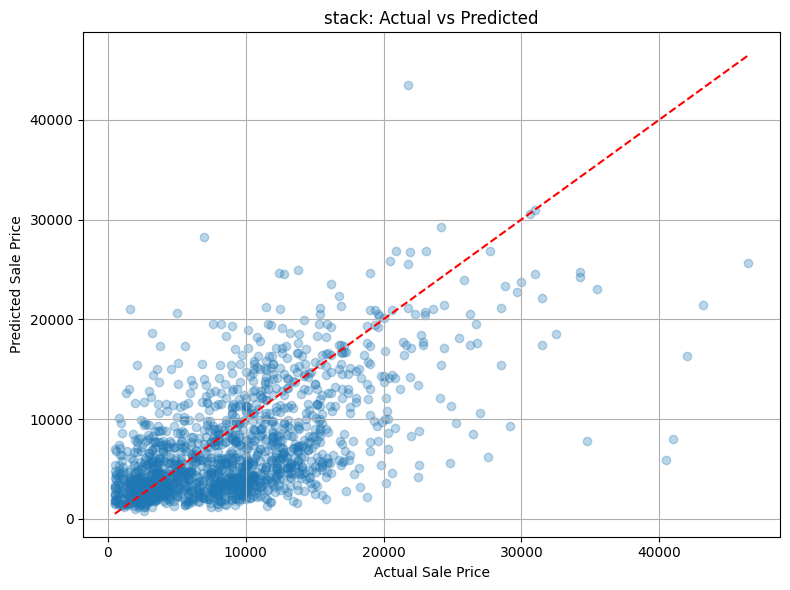

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('stack: Actual vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()

Visualize the actual prices and Predicted prices

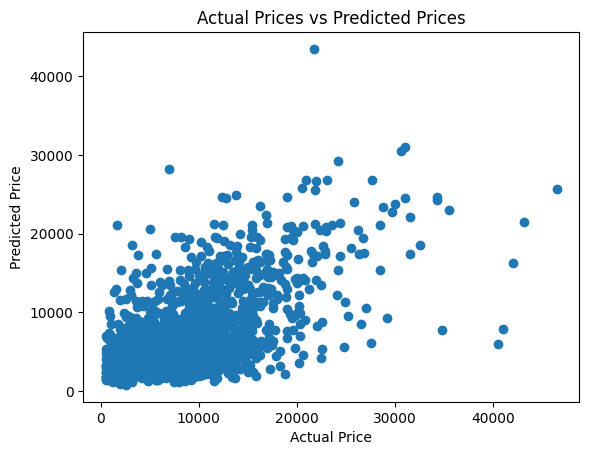

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Final Model Evaluation

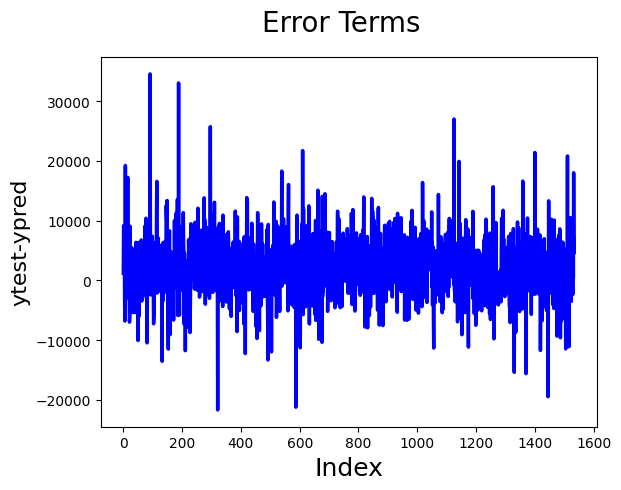

In [93]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label
plt.show()

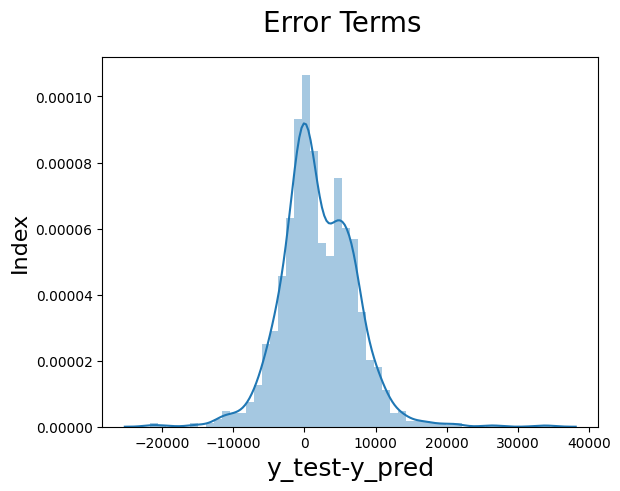

In [94]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label
plt.show()

Export the Predictions

In [95]:
# # Create a DataFrame with the original prices and the predicted sales prices
# result_df = pd.DataFrame({
#     'SoldPrice': y_test,  # Original prices from y_test
#     'XGB_Predictions': xgb_predictions,
#     'RF_Predictions': rf_predictions,
#     'Stacked_Predictions': y_pred
# })

result_df = pd.DataFrame({
    'XGB_Predictions': xgb_predictions,
    'CatBoost_Predictions': catboost_preds,
    'CatBoost_Native_Predictions': cat_preds,
    'Stacked_Predictions': y_pred
})

final_df = pd.concat([cars_test_original.reset_index(drop=True), result_df.reset_index(drop=True)], axis=1)

# Export the DataFrame to a CSV file
final_df.to_excel('Price Prediction Test.xlsx', index=False)